In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\manth\Downloads\salaries (2).csv")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
16529,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
16530,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
16531,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
16532,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [3]:
# check the number of rows and columns
df.shape

(16534, 11)

In [4]:
# check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [5]:
# check the null values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
# chech the duplicated values
df.duplicated(keep = False).sum()

8973

In [7]:
# check the statistical analysis
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,16534.000000,1.653400e+04,16534.000000,16534.000000
mean,2023.226866,1.637270e+05,149686.777973,32.003750
std,0.713558,3.402057e+05,68505.293156,46.245158
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.017630e+05,101125.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.872000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


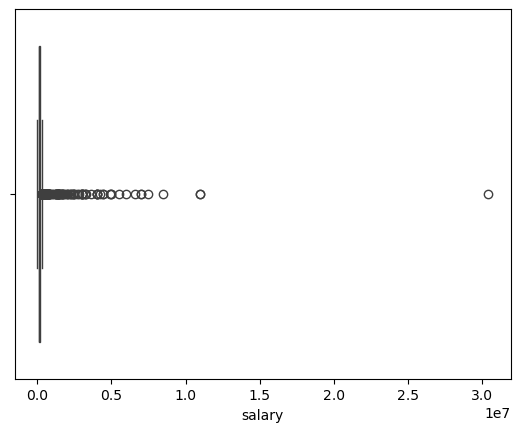

In [8]:
# check the outliers 
sns.boxplot(x ='salary',data = df)
plt.show()

In [9]:
q1,q3 = np.percentile(df['salary'],[25,75])
iqr = q3-q1
lower = q1-1.5*iqr
upper = q3+1.5*iqr
outlier = df['salary'][(df['salary']>upper)|(df['salary']<lower)]
print(outlier)
print(min(outlier))

6         400000
145       800000
309       385000
385       370000
393       720000
          ...   
16509    1335000
16514    1450000
16526     423000
16529     412000
16533    7000000
Name: salary, Length: 345, dtype: int64
315850


In [10]:
# remove outliers
df = df[df['salary']<=315850]

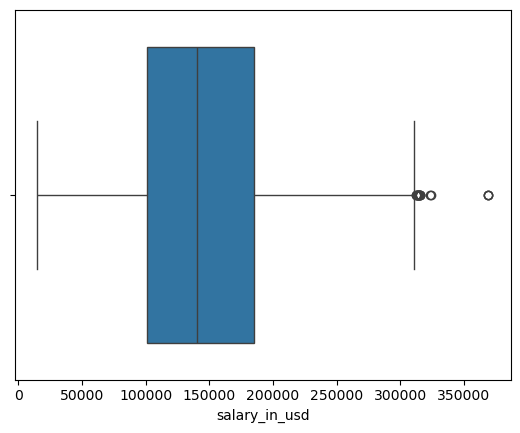

In [11]:
# check the outliers
sns.boxplot(x ='salary_in_usd',data = df)
plt.show()

In [12]:
q1,q3 = np.percentile(df['salary_in_usd'],[25,75])
iqr = q3-q1
lower = q1-1.5*iqr
upper = q3+1.5*iqr
outlier = df['salary_in_usd'][(df['salary_in_usd']>upper)|(df['salary_in_usd']<lower)]
print(outlier)
print(min(outlier))

831      312300
1018     314100
1290     315000
1800     312287
1963     323295
3651     313000
3958     314000
4218     313000
4222     315000
4450     314100
8615     369120
9044     369120
9058     369120
10613    315300
11220    315850
11486    315850
12605    323905
14219    314100
15217    315000
Name: salary_in_usd, dtype: int64
312287


In [13]:
# remove outliers
df = df[df['salary_in_usd']<=312287]

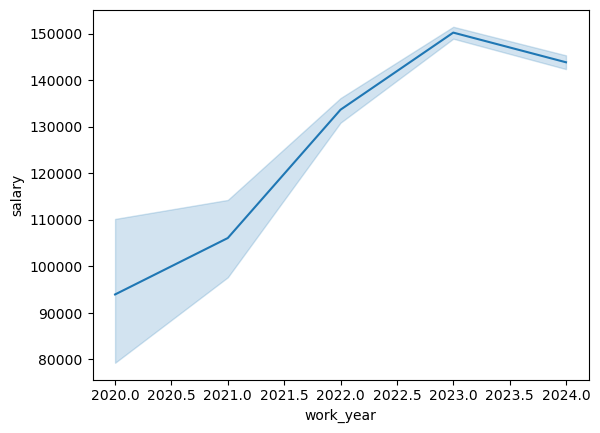

In [14]:
# data visulization
sns.lineplot(x = 'work_year',y = 'salary',data = df)
plt.show()

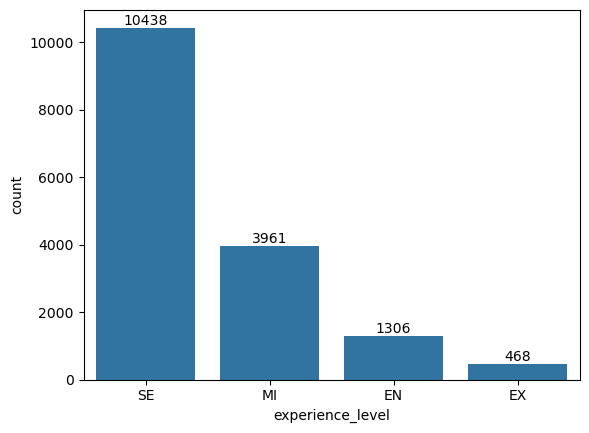

In [15]:
a = sns.countplot(x = 'experience_level',data = df)
for i in a.containers:
    a.bar_label(i,)
plt.show()

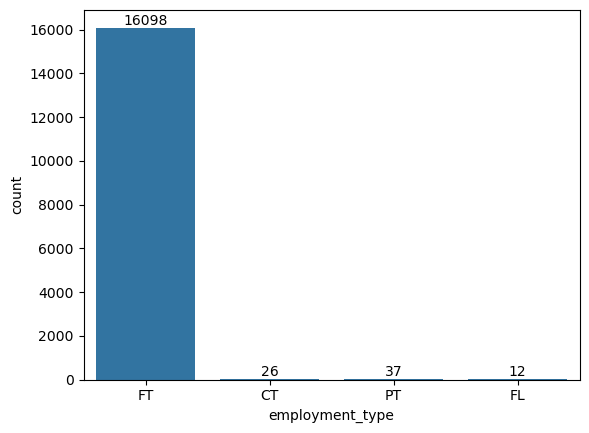

In [16]:
b = sns.countplot(x = 'employment_type',data = df)
for i in b.containers:
    b.bar_label(i,)
plt.show()

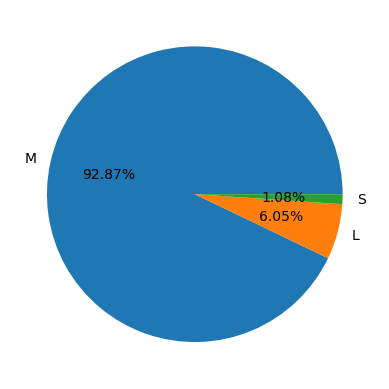

In [17]:
c = df['company_size'].value_counts()
plt.pie(x = c.values,labels = c.index,autopct='%.2f%%')
plt.show()

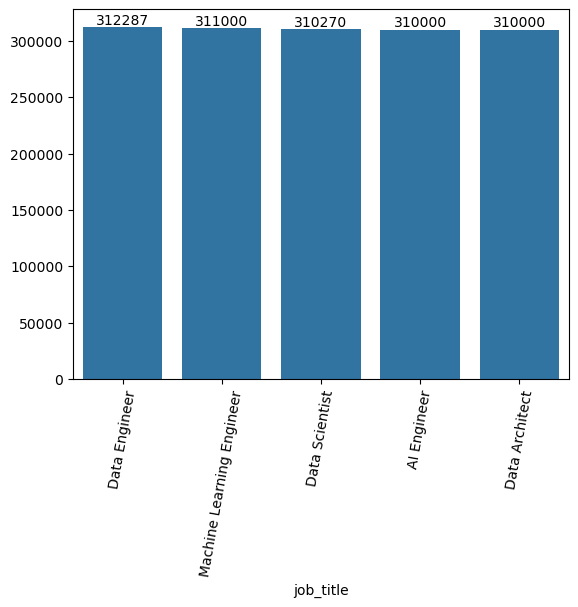

In [18]:
d = df.groupby('job_title')['salary'].max().sort_values(ascending = False).head(5)
e = sns.barplot(x = d.index,y = d.values)
for i in e.containers:
    e.bar_label(i,)
plt.xticks(rotation = 80)
plt.show()

In [19]:
# future enconding
from sklearn.preprocessing import LabelEncoder

In [20]:
la = LabelEncoder()

In [21]:
df['newexperience_level'] = la.fit_transform(df['experience_level'])

In [22]:
df['newemployment_type'] = la.fit_transform(df['employment_type'])

In [23]:
df['newcompany_size'] = la.fit_transform(df['company_size'])

In [24]:
df['newjob_title'] = la.fit_transform(df['job_title'])

In [25]:
df['newsalary_currency'] = la.fit_transform(df['salary_currency'])

In [26]:
df['newemployee_residence'] = la.fit_transform(df['employee_residence'])

In [27]:
df['newcompany_location'] = la.fit_transform(df['company_location'])

In [28]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,newexperience_level,newemployment_type,newcompany_size,newjob_title,newsalary_currency,newemployee_residence,newcompany_location
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M,3,2,1,2,11,82,71
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M,3,2,1,2,11,82,71
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M,3,2,1,56,11,82,71
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M,3,2,1,56,11,82,71
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M,3,2,1,118,11,82,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16527,2021,MI,FT,Data Engineer,24000,EUR,28369,MT,50,MT,L,2,2,0,56,5,55,48
16528,2021,SE,FT,Data Specialist,165000,USD,165000,US,100,US,L,3,2,0,90,11,82,71
16530,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L,2,2,0,137,11,82,71
16531,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S,0,2,2,88,11,82,71


In [29]:
df.drop(['experience_level','employment_type','company_size','job_title','salary_currency','employee_residence','company_location'],axis = 1,inplace = True)

In [30]:
# input columns
x = df.drop('salary',axis = 1).values
x

array([[  2024, 202730,      0, ...,     11,     82,     71],
       [  2024,  92118,      0, ...,     11,     82,     71],
       [  2024, 130500,      0, ...,     11,     82,     71],
       ...,
       [  2021, 151000,    100, ...,     11,     82,     71],
       [  2020, 105000,    100, ...,     11,     82,     71],
       [  2020, 100000,    100, ...,     11,     82,     71]], dtype=int64)

In [31]:
# output columns
y = df['salary'].values
y

array([202730,  92118, 130500, ..., 151000, 105000, 100000], dtype=int64)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [34]:
model = LinearRegression()

In [35]:
model.fit(x_train,y_train)

LinearRegression()

In [40]:
model.score(x_test,y_test)

0.9906194983646675

In [38]:
y_pre = model.predict(x_test)
y_pre

array([ 93364.49598754, 193848.23525932, 246830.33494118, ...,
       139426.35622636, 149434.08554948, 121348.59828232])

In [41]:
y_test

array([ 93838, 194500, 247300, ..., 140000, 150000, 122000], dtype=int64)

In [42]:
from sklearn.metrics import r2_score

In [43]:
r2_score(y_test,y_pre)

0.9906194983646675